In [1]:
import numpy as np
import os

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
img_folder = '/home/data/lyt/TextVQA/train_images'
img_folder_test = '/home/data/lyt/TextVQA/test_images'
root_folder = '/home/lyt/code/vqa-concept'
fea_folder = '{}/dataTVQA/image-feature/bottomup'.format(root_folder)
obj_vocab_file = '{}/data/objects_vocab.txt'.format(root_folder)

In [4]:
with open(obj_vocab_file) as f:
    labels = ['__no_object__'] + f.read().splitlines()

In [5]:
split_name = 'test'
if split_name == 'test':
    img_folder = img_folder_test
img_id=np.load(os.path.join(fea_folder,'{}_100_id.npy'.format(split_name)))
img_bbox=np.load(os.path.join(fea_folder,'{}_100_bbox.npy'.format(split_name)))
img_label=np.load(os.path.join(fea_folder,'{}_100_class-prob.npy'.format(split_name)))

In [6]:
print(img_id.shape)
print(img_bbox.shape)
print(img_label.shape)

(3289,)
(3289, 100, 4)
(3289, 100, 1601)


In [7]:
i=0
j=0

In [8]:
print(img_id[i])
print(img_bbox[i][j])
print(img_label[i][j])

000c5171b38d4bb0
[129.15108 253.55515 277.9098  370.67087]
[5.5668950e-02 1.4456192e-07 1.0773947e-05 ... 4.4321246e-07 3.5961477e-07
 2.9328521e-05]


In [9]:
print('Max label value: {}\nMax label index: {} ({})'
      .format(np.max(img_label[i][j]),np.argmax(img_label[i][j]),labels[np.argmax(img_label[i][j])]))

Max label value: 0.8940682411193848
Max label index: 951 (crane)


In [10]:
img = imread(os.path.join(img_folder,img_id[i]+'.jpg'))

(681, 1024, 3)


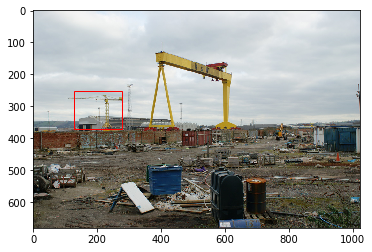

In [11]:
print(img.shape)
fig,ax = plt.subplots(1)
ax.imshow(img)
ax.add_patch(Rectangle((img_bbox[i][j][0],img_bbox[i][j][1]),img_bbox[i][j][2]-img_bbox[i][j][0],img_bbox[i][j][3]-img_bbox[i][j][1],
                       linewidth=1,edgecolor='r',facecolor='none'))
plt.show()